# 9 - Estimación de profundidad

<br>
<br>

<img src="https://raw.githubusercontent.com/Hack-io-AI/ai_images/main/img_depth.webp" style="width:400px;"/>

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1---Modelos-de-estimación-de-profundidad" data-toc-modified-id="1---Modelos-de-estimación-de-profundidad-1">1 - Modelos de estimación de profundidad</a></span></li><li><span><a href="#2---Pipeline-de-Transformers-para-estimación-de-profundidad" data-toc-modified-id="2---Pipeline-de-Transformers-para-estimación-de-profundidad-2">2 - Pipeline de Transformers para estimación de profundidad</a></span></li><li><span><a href="#3---Usando-el-modelo-estimador" data-toc-modified-id="3---Usando-el-modelo-estimador-3">3 - Usando el modelo estimador</a></span><ul class="toc-item"><li><span><a href="#3.1---Procesador-de-imágenes" data-toc-modified-id="3.1---Procesador-de-imágenes-3.1">3.1 - Procesador de imágenes</a></span></li><li><span><a href="#3.2---Modelo-estimador-de-profundidad" data-toc-modified-id="3.2---Modelo-estimador-de-profundidad-3.2">3.2 - Modelo estimador de profundidad</a></span></li><li><span><a href="#3.3---Resumen-del-código" data-toc-modified-id="3.3---Resumen-del-código-3.3">3.3 - Resumen del código</a></span></li></ul></li></ul></div>

## 1 - Modelos de estimación de profundidad

Los modelos de estimación de profundidad son algoritmos que utilizan datos visuales para calcular la distancia entre el observador, o la cámara, y los objetos en una escena. Estos modelos son cruciales en diversas aplicaciones, como la visión por computador, la realidad aumentada, la robótica o la conducción autónoma. Algunos tipos de modelos de estimación de profundidad son los siguientes:


1. **Estimación de profundidad monocular**: Utiliza una sola imagen para estimar la profundidad. Ejemplos de modelos para esta tarea son las redes neuronales convolucionales (CNN) o Vision Transformers (ViT). Algunas aplicaciones son detección de objetos, segmentación semántica o realidad aumentada en dispositivos móviles.


2. **Estimación de profundidad estereoscópica**: Utiliza dos imágenes, en estéreo, capturadas desde diferentes puntos de vista para calcular la profundidad. Ejemplo de modelo para esta tarea son los Disparity Maps, métodos basados en correlación y coincidencia de características. Se utilizan en sistemas de cámaras estéreo en vehículos autónomos o robots.


3. **Estimación de profundidad basada en múltiples vistas** (Multi-view Stereo, MVS): Utiliza varias imágenes de la misma escena tomadas desde diferentes ángulos para construir un mapa de profundidad. Ejemplos de modelos para esta tarea son los SfM (Structure from Motion) o MVSNet. Se utilizan para reconstrucción 3D o modelado de escenas.


4. **Estimación de profundidad basada en sensores activos**: Utiliza dispositivos como LiDAR, sensores de tiempo de vuelo (ToF) o cámaras de infrarrojos para medir directamente la distancia a los objetos. Se utilizan en vehículos autónomos, robótica, videojuegos o mapeo 3D.


5. **Modelos híbridos**: Combinan múltiples fuentes de datos, como imágenes y datos de sensores, para mejorar la precisión de la estimación de profundidad.

**Aplicaciones Comunes**:

+ Visión por computador y aprendizaje automático: Los modelos de estimación de profundidad se utilizan en la segmentación de imágenes, reconocimiento de objetos y la navegación autónoma.

+ Robótica: Ayudan a los robots a comprender su entorno y a moverse de manera segura y eficiente.

+ Realidad aumentada y virtual: Permiten la superposición precisa de objetos virtuales en el mundo real.

+ Conducción autónoma: Los vehículos autónomos utilizan estos modelos para detectar y reaccionar ante obstáculos y otros vehículos.


## 2 - Pipeline de Transformers para estimación de profundidad

Usaremos el modelo [DPT](https://huggingface.co/Intel/dpt-large) creado por Intel. El modelo DPT (Dense Prediction Transformer) está entrenado con 1.4 millones de imágenes para la estimación de profundidad monocular. Fue introducido en el artículo [Vision Transformers for Dense Prediction](https://arxiv.org/abs/2103.13413) por Ranftl et al. en 2021. DPT utiliza el modelo ViT como backbone y añade un cuello y una cabeza en la parte superior para la estimación de profundidad monocular. Al descargarlo pesa unos 1.4Gb.

In [1]:
# logging para quitar warnings de actualización de pesos del modelo

from transformers import logging

logging.set_verbosity_error()

In [2]:
# importamos desde la librería transformers el pipeline

from transformers import pipeline

In [3]:
# definimos la tarea y el modelo

tarea = 'depth-estimation'  

modelo = 'Intel/dpt-large' 

In [4]:
# iniciamos el estimador de profundidad, los modelos se descargan en local, en este caso son unos 1.4GB

prof_pipe = pipeline(task=tarea, model=modelo)

Usaremos un imagen de una [calle](https://unsplash.com/photos/HwBAsSbPBDU/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MzR8fGNhciUyMGluJTIwdGhlJTIwc3RyZWV0fGVufDB8MHx8fDE2Nzg5MDEwODg&force=true&w=640) para probar el modelo de estimación de profundidad. La cargamos con PIL desde la url para luego pasársela al pipeline.

In [5]:
# url de la imagen

url = 'https://unsplash.com/photos/HwBAsSbPBDU/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MzR8fGNhciUyMGluJTIwdGhlJTIwc3RyZWV0fGVufDB8MHx8fDE2Nzg5MDEwODg&force=true&w=640'

In [6]:
# librerias PIL y requests
from PIL import Image
import requests as req


# imagen como objeto PIL
imagen = Image.open(fp=req.get(url, stream=True).raw)

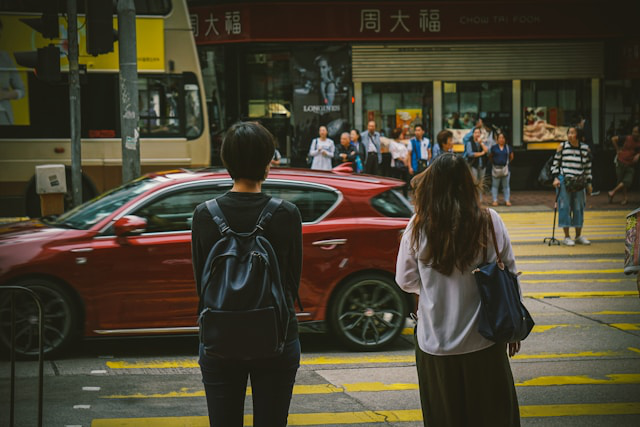

In [7]:
# visualización

imagen

In [8]:
# llamada al pipeline para la segmentación de la imagen

respuesta = prof_pipe(images=imagen)

respuesta.keys()

dict_keys(['predicted_depth', 'depth'])

El pipeline devuelve un diccionario con dos keys. La primera, predicted_depth, es un tensor con los valores de la profundidad expresados en metros para cada píxel. La segunda, depth, es una imagen PIL que visualiza el resultado de la estimación de profundidad.

In [9]:
# estimación distancia mínima en metros

respuesta['predicted_depth'].min()

tensor(0.6265)

In [10]:
# estimación distancia máxima en metros

respuesta['predicted_depth'].max()

tensor(38.2516)

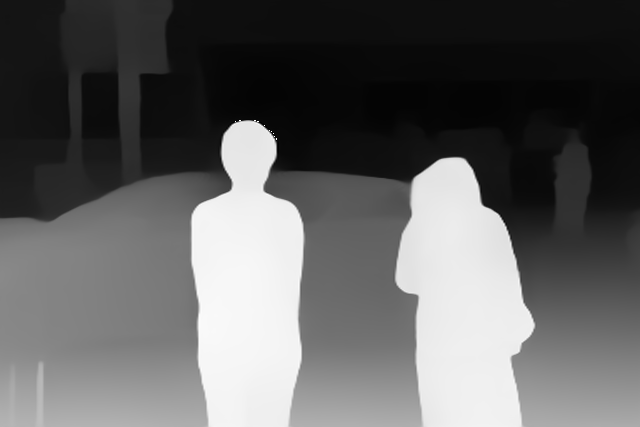

In [11]:
# visualización de la estimación de profundidad

respuesta['depth']

## 3 - Usando el modelo estimador

In [12]:
# importamos los objetos procesador y modelo de estimación de profundidad

from transformers import AutoImageProcessor, AutoModelForDepthEstimation

### 3.1 - Procesador de imágenes

In [13]:
# procesa las imágenes y extrae las características

procesador = AutoImageProcessor.from_pretrained('Intel/dpt-large')

In [14]:
# descripcion del objeto

procesador

DPTImageProcessor {
  "do_normalize": true,
  "do_pad": false,
  "do_rescale": true,
  "do_resize": true,
  "ensure_multiple_of": 1,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "DPTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "keep_aspect_ratio": false,
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  },
  "size_divisor": null
}

In [15]:
# procesamiento de la imagen

img_procesada = procesador(images=imagen, return_tensors='pt')

In [16]:
# una imagen, 3 canales, 384X384 píxeles

img_procesada['pixel_values'].shape

torch.Size([1, 3, 384, 384])

### 3.2 - Modelo estimador de profundidad

AutoModelForDepthEstimation es una clase en la biblioteca transformers que proporciona una interfaz fácil y flexible para cargar automáticamente un modelo preentrenado específico para la tarea de estimación de profundidad. Esta clase permite a los usuarios cargar modelos sin necesidad de especificar explícitamente la arquitectura del modelo, simplemente proporcionando el nombre del modelo preentrenado.


In [17]:
# inicializacion del modelo DPT

modelo_estimador = AutoModelForDepthEstimation.from_pretrained('Intel/dpt-large')

In [18]:
# descripcion del objeto

modelo_estimador

DPTForDepthEstimation(
  (dpt): DPTModel(
    (embeddings): DPTViTEmbeddings(
      (patch_embeddings): DPTViTPatchEmbeddings(
        (projection): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DPTViTEncoder(
      (layer): ModuleList(
        (0-23): 24 x DPTViTLayer(
          (attention): DPTViTAttention(
            (attention): DPTViTSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): DPTViTSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): DPTViTIntermediate(
            

**Componentes Principales del Modelo**


1. **GLPNModel**: La estructura general del modelo GLPN.

    + encoder: El codificador que procesa las imágenes de entrada.
    + patch_embeddings: Una lista de módulos que realizan la incrustación de paquetes, pequeñas regiones de la imagen, usando convoluciones.
    + GLPNOverlapPatchEmbeddings: Utiliza capas de convolución, Conv2d, para extraer características de la imagen en parches solapados y normalización (LayerNorm).
    + block: Una lista de capas GLPN, cada una de las cuales contiene:
        + LayerNorm: Normalización por capas.
        + GLPNAttention: Mecanismo de atención eficiente.
        + GLPNSelfOutput: La salida del mecanismo de atención.
        + GLPNMixFFN: Redes de alimentación hacia adelante mixtas con capas de convolución y activación GELU.
        + GLPNDropPath: Mecanismo para aplicar regularización mediante caminos de caída (drop paths).
    + layer_norm: Lista de normalizaciones por capas aplicadas en diferentes puntos del modelo.


2. **GLPNDecoder**: El decodificador que convierte las características codificadas en un mapa de profundidad.

    + stages: Una lista de etapas de decodificación, GLPNDecoderStage, cada una de las cuales contiene:
        + convolution: Capas de convolución para reducir la dimensionalidad de las características.
        + fusion: Fusión selectiva de características.
        + upsample: Capas de remuestreo, upsample, para aumentar la resolución espacial.
    + final_upsample: Una capa final de remuestreo para obtener la resolución deseada.


3. **GLPNDepthEstimationHead**: La cabeza del modelo para la estimación de profundidad.

    + head: Un conjunto secuencial de capas.
    + Conv2d: Capas de convolución para refinar las características.
    + ReLU: Función de activación ReLU.
    + Conv2d: Capa final de convolución que produce el mapa de profundidad.


**Detalle de Componentes**


+ GLPNOverlapPatchEmbeddings: Utiliza capas de convolución para dividir la imagen en paquetes solapados y normaliza cada paquete.
+ GLPNAttention: Implementa un mecanismo de atención eficiente que permite al modelo enfocarse en diferentes partes de la imagen.
+ GLPNMixFFN: Redes de alimentación hacia adelante mixtas que combinan convoluciones y activaciones GELU para capturar mejor las características.
+ GLPNDropPath: Introduce regularización en el modelo mediante la técnica de caminos de caída.
+ GLPNSelectiveFeatureFusion: Fusión selectiva de características para combinar información de diferentes niveles del modelo.
+ GLPNDepthEstimationHead: La cabeza del modelo que produce el mapa de profundidad final a partir de las características decodificadas.


**Funcionamiento General**

+ Codificación: La imagen de entrada se procesa a través del codificador, que extrae características de diferentes niveles usando convoluciones, atención y normalización.
+ Decodificación: Las características codificadas se procesan a través del decodificador, que utiliza convoluciones, fusión de características y remuestreo para reconstruir un mapa de profundidad.
+ Estimación de Profundidad: La cabeza del modelo toma las características decodificadas y produce un mapa de profundidad final.

In [19]:
# resultado del modelo GLPN al darle la imagen procesada

tensor = modelo_estimador(**img_procesada)

El tensor que devuelve el modelo es el mismo que devolvía el pipeline para la estimación de profundidad en metros. Para poder representar la imagen como objeto PIL, necesitamos transformar el tensor a un array de numpy y sus valores deben estar entre 0 y 255. Primero veamos sus dimensiones, su mínimo y su máximo y a continuación transformemos el tensor para obtener la imagen como objeto PIL.

In [20]:
# dimensiones del tensor

tensor.predicted_depth.size()

torch.Size([1, 384, 384])

In [21]:
# estimación distancia mínima en metros

tensor.predicted_depth.min()

tensor(0.6265, grad_fn=<MinBackward1>)

In [22]:
# estimación distancia máxima en metros

tensor.predicted_depth.max()

tensor(38.2516, grad_fn=<MaxBackward1>)

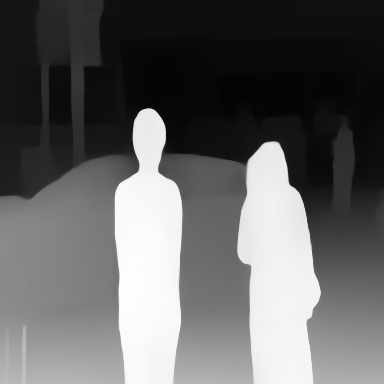

In [23]:
# conversión del tensor a array de numpy
profundidad = tensor.predicted_depth[0].detach().numpy()

# normalización, valores entre 0 y 255
array = (profundidad * 255 / profundidad.max()).astype('uint8')

# imagen como objeto PIL
Image.fromarray(array)

### 3.3 - Resumen del código

Vamos a poner todo el código junto en una sola función:

In [24]:
# librerías
import numpy as np
from PIL import Image
from transformers import AutoImageProcessor, AutoModelForDepthEstimation



def estimador_profundidad(imagen: object) -> dict:
    
    """
    Función para estimar la profundidad de una imagen
    
    Params:
    imagen: objeto PIL.JpegImagePlugin.JpegImageFile
    
    Return:
    diccionario con el tensor de estimación de profundidad en metros y la imagen como objeto PIL
    """
    
    
    # procesa las imágenes y extrae las características
    procesador = AutoImageProcessor.from_pretrained('Intel/dpt-large')
    
    
    # procesamiento de la imagen
    img_procesada = procesador(images=imagen, return_tensors='pt')
    
    # inicializacion del modelo DPT
    modelo_estimador = AutoModelForDepthEstimation.from_pretrained('Intel/dpt-large')
    
    
    # resultado del modelo GLPN al darle la imagen procesada
    tensor = modelo_estimador(**img_procesada)
    
    
    # conversión del tensor a array de numpy
    profundidad = tensor.predicted_depth[0].detach().numpy()

    # normalización, valores entre 0 y 255
    array = (profundidad * 255 / profundidad.max()).astype('uint8')

    # imagen como objeto PIL
    img_profundidad = Image.fromarray(array)
    
    return {'tensor': tensor.predicted_depth[0], 'imagen': img_profundidad}

In [26]:
res = estimador_profundidad(imagen)

In [29]:
res['tensor'].shape

torch.Size([384, 384])

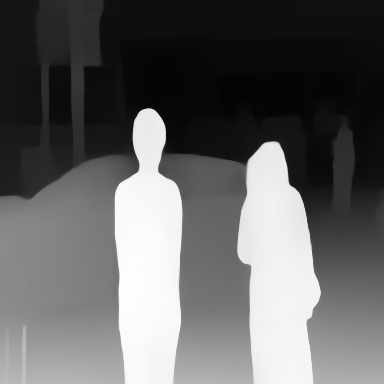

In [30]:
res['imagen']